In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
import pandas as pd
import api_utils
import app_utils

In [2]:
# setup payload
payload = {'straight': {
                'df': [],
                'runIds': [57, 58, 59],
                'x': 'Time (s)', 
                'y': 'Distance Traveled (m)' ,
                'titles': ['0.25 (m/s) Command for 2 s', '0.5 (m/s) Command for 2 s', '1.0 (m/s) Command for 1 s']
                }, 
            'turn': {
                'df': [],
                'runIds': [60, 61, 62],
                'x': 'Time (s)',
                'y': 'Angle (rads)',
                'titles': ['$\pi/8$ (rad/s) for 2 seconds', '$\pi/2$ (rad/s) for 2 seconds', '$\pi$ (rad/s) for 2 seconds']
                },
            'square': {
                'df': [],
                'runIds': [64],
                'x': 'Time (s)',
                'y': 'Angle (rad)',
                'titles': ['Drive Squre four times']
                }, 
            'slam':{
                'df': [],
                'runIds': [65], 
                'x': 'Time (s)',
                'y': 'Theta (rad)',
                'titles': ['Slam vs. True Pose']
                }
            }
payload

{'straight': {'df': [],
  'runIds': [57, 58, 59],
  'x': 'Time (s)',
  'y': 'Distance Traveled (m)',
  'titles': ['0.25 (m/s) Command for 2 s',
   '0.5 (m/s) Command for 2 s',
   '1.0 (m/s) Command for 1 s']},
 'turn': {'df': [],
  'runIds': [60, 61, 62],
  'x': 'Time (s)',
  'y': 'Angle (rads)',
  'titles': ['$\\pi/8$ (rad/s) for 2 seconds',
   '$\\pi/2$ (rad/s) for 2 seconds',
   '$\\pi$ (rad/s) for 2 seconds']},
 'square': {'df': [],
  'runIds': [64],
  'x': 'Time (s)',
  'y': 'Angle (rad)',
  'titles': ['Drive Squre four times']},
 'slam': {'df': [],
  'runIds': [65],
  'x': 'Time (s)',
  'y': 'Theta (rad)',
  'titles': ['Slam vs. True Pose']}}

In [3]:
# get all data from the database
for straightRunId, turnRundId in zip(payload['straight']['runIds'], payload['turn']['runIds']):
    # append straight runs
    payload['straight']['df'].append(api_utils.get_df(straightRunId))
    # append turn runs
    payload['turn']['df'].append(api_utils.get_df(turnRundId))

# append square
payload['square']['df'].append(api_utils.get_df(payload['square']['runIds'][0]))

# append slam 
payload['slam']['df'].append(api_utils.get_df(payload['slam']['runIds'][0]))

In [4]:
# example of how to see data
payload['square']['df'][0].keys()

dict_keys(['MBOT_IMU', 'MBOT_ENCODERS', 'ODOMETRY', 'MBOT_STATE', 'MBOT_SETPOINTS', 'SLAM_POSE', 'CONTROLLER_PATH', 'MBOT_MOTOR_COMMAND'])

In [5]:
payload['slam']['df'][0]['TRUE_POSE'].keys()

dict_keys(['timestamp', 'utime', 'x', 'y', 'theta'])

In [6]:
# set plot info for driving straight
plotInfo1 = []
# row 1
plotInfo1 = app_utils.define_plot(plotInfo1, 'ODOMETRY', 'x', 0, '(m)')

# row 2
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'right_velocity', 1, '(m/s)')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'right_velocity', 1, '(m/s)')

# row 3
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_SETPOINTS', 'left_velocity', 2, '(m/s)')
plotInfo1 = app_utils.define_plot(plotInfo1, 'MBOT_STATE', 'left_velocity', 2, '(m/s)')
plotInfo1

[{'channel': 'ODOMETRY', 'value': 'x', 'row': 0, 'ylabel': '(m)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(m/s)'}]

In [7]:
# set plot info for turning
plotInfo2 = []

# row 1
plotInfo2 = app_utils.define_plot(plotInfo2, 'ODOMETRY', 'theta', 0, '(rad)')

# row 2
# set points
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'right_velocity', 1, '(rad/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'right_velocity', 1, '(rad/s)')

# row 3
# setpoints
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_SETPOINTS', 'left_velocity', 2, '(rad/s)')
plotInfo2 = app_utils.define_plot(plotInfo2, 'MBOT_STATE', 'left_velocity', 2, '(rads/s)')
plotInfo2

[{'channel': 'ODOMETRY', 'value': 'theta', 'row': 0, 'ylabel': '(rad)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'right_velocity',
  'row': 1,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_SETPOINTS',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(rad/s)'},
 {'channel': 'MBOT_STATE',
  'value': 'left_velocity',
  'row': 2,
  'ylabel': '(rads/s)'}]

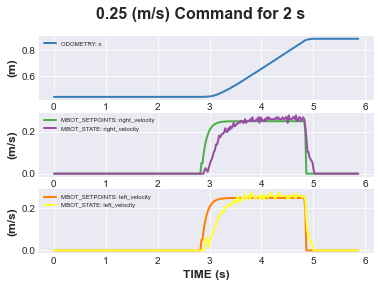

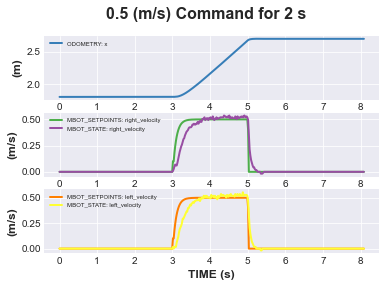

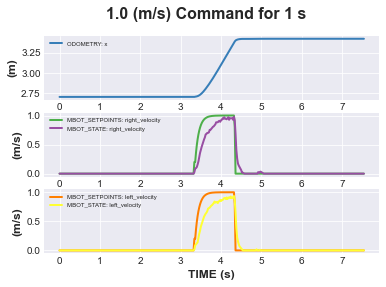

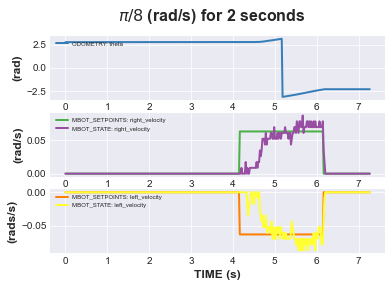

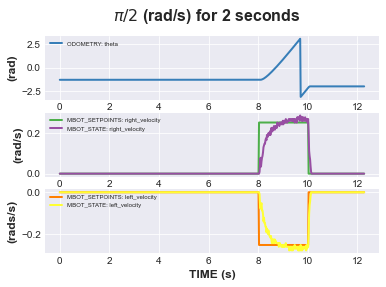

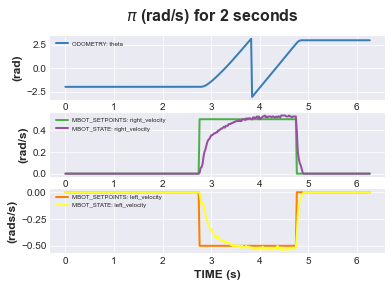

In [8]:
# set run type and run number
runtypes = ['straight', 'turn']
plotInfos = [plotInfo1, plotInfo2]
runs = [0, 1, 2]

# number of rows
rows = 3
# go through each runtype and match plot values
for runtype, plotInfo in zip(runtypes, plotInfos):
    # go through each run
    for run in runs:
        # get df for runtype and run combo
        df = payload[runtype]['df'][run]
        # overall labels
        xlabel = payload[runtype]['x']
        title = payload[runtype]['titles'][run]
        # get figure 
        app_utils.get_plot(df, plotInfo, title, xlabel, rows)


In [9]:
# plot slam pose over time for driving in square
plotInfo3 = []
plotInfo3 = app_utils.define_plot(plotInfo3, 'SLAM_POSE', 'theta', 0, '(rad)')


In [10]:
#  dead reckoning plot
runtype = 'square'
run = 0

# get df for runtype and run combo
df = payload[runtype]['df'][run]
# overall labels
xlabel = payload[runtype]['x']
title = payload[runtype]['titles'][run]



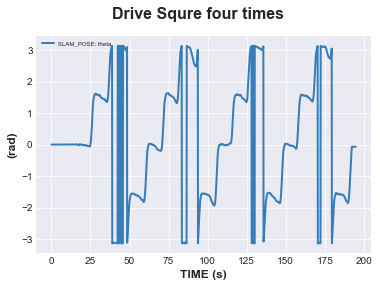

In [11]:
rows = 1
# get figure 
fig = app_utils.get_plot(df, plotInfo3, title, xlabel, rows)



In [12]:
plotInfo4 = []
plotInfo4 = app_utils.define_plot(plotInfo4, 'SLAM_POSE', 'theta', 0, '(rad)')
plotInfo4 = app_utils.define_plot(plotInfo4, 'TRUE_POSE', 'theta', 0, '(rad)')


In [13]:
# true vs. slam pose
runtype = 'slam'
run = 0

# get df for runtype and run combo
df = payload[runtype]['df'][run]

# overall labels
xlabel = payload[runtype]['x']
title = payload[runtype]['titles'][run]

In [14]:
# get slam pose, true pose dataframes
sp = pd.DataFrame(df['SLAM_POSE'])
tp = pd.DataFrame(df['TRUE_POSE'])

# trim leading zeros on slam pose df
sp = sp.truncate(before=80)
sp.describe()

,timestamp,utime,x,y,theta
count,3.550000e+02,3.550000e+02,355.000000,355.000000,355.000000
mean,2.429082e+07,1.512689e+15,-0.082052,1.185419,-0.104116
std,7.180783e+06,7.579083e+06,0.938652,0.951319,1.777057
min,1.156251e+07,1.512689e+15,-1.416830,-0.007532,-3.118920
25%,1.774475e+07,1.512689e+15,-1.091662,0.323640,-1.603630
50%,2.389714e+07,1.512689e+15,-0.008099,1.030729,-0.273828
75%,3.052683e+07,1.512689e+15,0.939752,2.068597,1.423855
max,3.669874e+07,1.512689e+15,1.200463,2.596036,3.101927


In [15]:
# merge both dataframes on nearest utime value
combined_df = pd.merge_asof(sp, tp, on='utime', direction='nearest')

combined_df.head()

,timestamp_x,utime,x_x,y_x,theta_x,timestamp_y,x_y,y_y,theta_y
0,11562506,1512688533768807,0.000000,0.000000,0.000000,10533798,0.001920,0.001308,-0.008900
1,11620619,1512688533840394,0.000000,0.000000,0.000000,10722812,0.001902,0.001197,-0.008891
2,11763503,1512688533912600,0.003064,-0.001656,0.000823,10743813,0.001978,0.001211,-0.009195
3,11791283,1512688533983966,0.002600,-0.004185,0.022491,10763851,0.001994,0.001408,-0.008960
4,11943402,1512688534055810,0.003475,-0.003604,0.066797,10928896,0.001924,0.001135,-0.009049


In [16]:
# shift time and convert to seconds 
combined_df['time'] = combined_df['utime'] - combined_df['utime'][0]
combined_df['time'] = combined_df['time'] * 1e-6
combined_df.head()



,timestamp_x,utime,x_x,y_x,theta_x,timestamp_y,x_y,y_y,theta_y,time
0,11562506,1512688533768807,0.000000,0.000000,0.000000,10533798,0.001920,0.001308,-0.008900,0.000000
1,11620619,1512688533840394,0.000000,0.000000,0.000000,10722812,0.001902,0.001197,-0.008891,0.071587
2,11763503,1512688533912600,0.003064,-0.001656,0.000823,10743813,0.001978,0.001211,-0.009195,0.143793
3,11791283,1512688533983966,0.002600,-0.004185,0.022491,10763851,0.001994,0.001408,-0.008960,0.215159
4,11943402,1512688534055810,0.003475,-0.003604,0.066797,10928896,0.001924,0.001135,-0.009049,0.287003


In [17]:
# calculate rms 
rms = mean_squared_error(combined_df.theta_x, combined_df.theta_y, squared=False)
rms


0.07322607869176466

Text(0, -3, 'RMSE: 0.073')

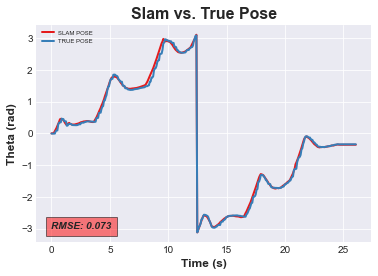

In [19]:
# plot values
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.plot(combined_df.time, combined_df.theta_x, linewidth=2, color= palette(0), label='SLAM POSE')
plt.plot(combined_df.time, combined_df.theta_y, linewidth=2, color= palette(1), label='TRUE POSE')
plt.legend(loc=2, prop={'size': 6})
plt.xlabel(payload['slam']['x'], fontsize=12, fontweight='bold')
plt.ylabel(payload['slam']['y'], fontsize=12, fontweight='bold')
plt.title(payload['slam']['titles'][0], fontsize=16, fontweight='bold')
plt.text(0, -3, f'RMSE: {rms:.3f}', fontweight='bold', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad': 5})